# Statistica inferenziale

## Introduzione

La statistica inferenziale si occupa di trarre conclusioni generali su una **popolazione** a partire da un **campione**.

A differenza della statistica descrittiva, che lavora solo con i dati disponibili, la statistica inferenziale mira a fare affermazioni oltre il campione osservato, cercando di stimare caratteristiche della popolazione da cui è stato estratto.

Il campionamento **NON** segue un criterio deterministico. Questo significa che, ogni volta che si effettua un campionamento dalla popolazione, i dati che si ottengono possono cambiare.

In altre parole, **il campione è aleatorio**:

- Ogni elemento del campione è il risultato di un processo casuale.

- Quindi i valori del campione sono trattati come **variabili aleatorie**.

> Esempio: se scegli un campione casuale di 100 persone da una popolazione di studenti per stimarne l’altezza media, ripetendo l’esperimento potresti ottenere un campione diverso, con una media diversa.

Poiché il campione è soggetto al caso, si assume che i suoi valori siano realizzazioni di una variabile aleatoria.

> Si ipotizza che i valori numerici del campione seguano un modello probabilistico, cioè siano generati da una distribuzione di probabilità non nota, indicata di solito con $F$.

Questa distribuzione $F$ rappresenta il comportamento probabilistico della popolazione da cui si campiona.

> anche se non si conosce la forma precisa di $F$, si possono formulare ipotesi (es. distribuzione normale, esponenziale, ecc.) o stimare $F$ a partire dai dati del campione.

La statistica inferenziale permette di capire con quale distribuzione descrivere le osservazioni, attraverso duemetodologie:

- **Statistica inferenziale non parametrica**: La distribuzione $F$ è completamente sconosciuta

- **Statistica inferenziale parametrica**: Della distribuzione è conosciuta solamente la famiglia (uno dei modelli), mentre sono sconosciuti i parametri del modello. Indichiamo la distribuzione con $F(\theta)$ dove $\theta$ è il parametro sconosciuto di cui stimiamoil valore:

- **Stima puntuale**: forniamo un numero molto vicino a $\theta$

- **Stima per intervalli**: forniamo un intervallo di valori in cui ricade $\theta$

Ma quindi che cosa è uno stimatore?

Uno stimatore è una **funzione del campione**, cioè un calcolo basato sui dati osservati, che viene utilizzata per stimare un parametro ignoto della popolazione.

> **Definizione**: Uno stimatore è una **variabile aleatoria** costruita a partire dai dati del campione, il cui valore approssima a un parametro ignoto $\theta$

Attenzione: poichè il campione è aleatorio, **anche lo stimatore è aleatorio**: ogni nuovo campione fornirà un valore diverso.

Esempio: Supponiamo di voler stimare la media $\mu$ della popolazione. Un possibile stimatore è la media campionaria $\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$ MA quindi perchè in questo caso la media campionaria è uno stimatore di $\mu$?

1. Supponiamo di avere una popolazione enorme, e di prenderne solamente una parte, ad esempio `30` persone

2. A questo punto calcolo la media del campione, ovvero la media campionaria

3. La media campionaria $\bar{X}$ è uno stimatore di $\mu$, cioè è un numero calcolato dai dati che cerca di avvicinarsi al valore reale $\mu$ che non conosciamo.

Attenzione però:

- $\bar{X}$ è una variabile aleatoria: ogni volta che cambi campione, $\bar{X}$ cambia!

- Però, in media, $\bar{X}$ si avvicina a $\mu$: è uno stimatore corretto (non distorto).

Esempio semplice:

Immaginiamo che la vera media della popolazione sia `5`, ma di prendere solo 5 numeri a caso e trovare una media campionaria $\bar{X} =$ `4.8`. Poi rifacciamo il campionamento e troviamo $\bar{X} =$ `5.2`, poi `5.1`... e così via. Ogni $\bar{X}$ è uno stimatore di $\mu$.

Di seguito uno scrypt per visualizzare e "giocare" con il concetto di **stimatore**, nel caso della media campionaria come stimatore della media $\mu$

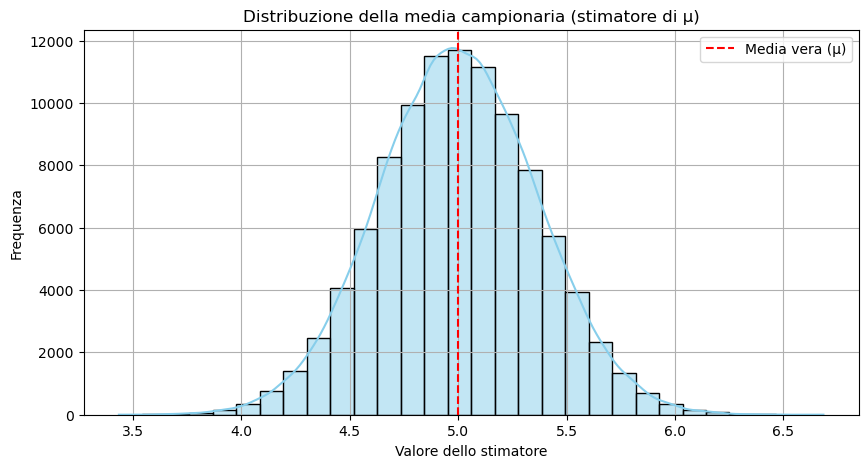

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parametri della popolazione
mu = 5      # media vera
sigma = 2   # deviazione standard vera

# Parametri della simulazione
n = 30       # dimensione del campione
N = 100000     # numero di campioni

# Lista per contenere le medie campionarie
medie_campionarie = []

for _ in range(N):
    campione = np.random.normal(mu, sigma, n)
    media_campione = np.mean(campione)
    medie_campionarie.append(media_campione)

# Plot: distribuzione dello stimatore (media campionaria)
plt.figure(figsize=(10, 5))
sns.histplot(medie_campionarie, kde=True, bins=30, color='skyblue', edgecolor='black')
plt.axvline(mu, color='red', linestyle='--', label='Media vera (μ)')
plt.title('Distribuzione della media campionaria (stimatore di μ)')
plt.xlabel('Valore dello stimatore')
plt.ylabel('Frequenza')
plt.legend()
plt.grid(True)
plt.show()


Cosa notiamo subito dal grafico?

Il grafico mostra la distribuzione delle **medie campionarie**: abbiamo estratto 1000 campioni da una popolazione normale con media 5 e calcolato la media di ciascun campione. Ecco cosa è possibile osservare:

- Le medie si ditribuiscono attorno alla vera media della popolazione.

- Anche se ogni campione è soggetto a variabilità, nel complesso le medie si concentrano vicino a $\mu$

- Questo illustra che la media campionaria è uno stimatore della media della popolazione: un valore calcolato da un campione che cerca di approssimare un parametro incognito della popolazione

All'aumentare della dimensione del campione, è possibile notare dal grafico come la distribuzione si avvicini  a $\mu$: altra caratteristica che ci suggerisce la correttezza del campione!

#### Stimatore non deviato

Uno stimatore è detto **non deviato** se la sua media è uguale al valore vero del parametro che si vuole stimare

Esempio:

La media campionaria $\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$ è uno **stimatore non deviato** della media della popolazione $\mu$ perchè: $E[\bar{X}] = 0$